# Reactive VTR

In [3]:
from radd import build, vis
from radd.toolbox import analyze

In [4]:
d = 'FinalRe/vtr'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)
m = build.Model(data=redata, kind='xradd', dynamic='hyp', tb=.650, depends_on={'v':'Cond', 'tr':'Cond'})
m.optimize(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)

basinhopping step 0: f 0.00859245
basinhopping step 1: f 0.00859245 trial_f 0.428406 accepted 0  lowest_f 0.00859245
basinhopping step 2: f 0.132665 trial_f 0.132665 accepted 1  lowest_f 0.00859245
basinhopping step 3: f 0.00594212 trial_f 0.00594212 accepted 1  lowest_f 0.00594212
found new global minimum on step 3 with function value 0.00594212
basinhopping step 4: f 0.00480927 trial_f 0.00480927 accepted 1  lowest_f 0.00480927
found new global minimum on step 4 with function value 0.00480927
basinhopping step 5: f 0.264695 trial_f 0.264695 accepted 1  lowest_f 0.00480927
basinhopping step 6: f 0.031913 trial_f 0.031913 accepted 1  lowest_f 0.00480927
basinhopping step 7: f 0.0663889 trial_f 0.0663889 accepted 1  lowest_f 0.00480927
basinhopping step 8: f 0.0663889 trial_f 0.454302 accepted 0  lowest_f 0.00480927
basinhopping step 9: f 2.30577 trial_f 2.30577 accepted 1  lowest_f 0.00480927
adaptive stepsize: acceptance rate 0.700000 target 0.500000 new stepsize 0.0555556 old stepsiz

In [ ]:
vis.plot_fits(m.avg_y[0], m.fits[:16], kind='radd', colors=["#e67e22"]*2, data=redata.query('Cond=="pnl"'))
plt.savefig('rebsl_drift_onset_fits.png', dpi=500)
plt.savefig('rebsl_drift_onset_fits.svg', rasterized=True)
vis.plot_fits(m.avg_y[1], m.fits[16:], kind='radd',colors=["#e67e22"]*2,  data=redata.query('Cond=="pnl"'))
plt.savefig('repnl_drift_onset_fits.png', dpi=500)
plt.savefig('repnl_drift_onset_fits.svg', rasterized=True)

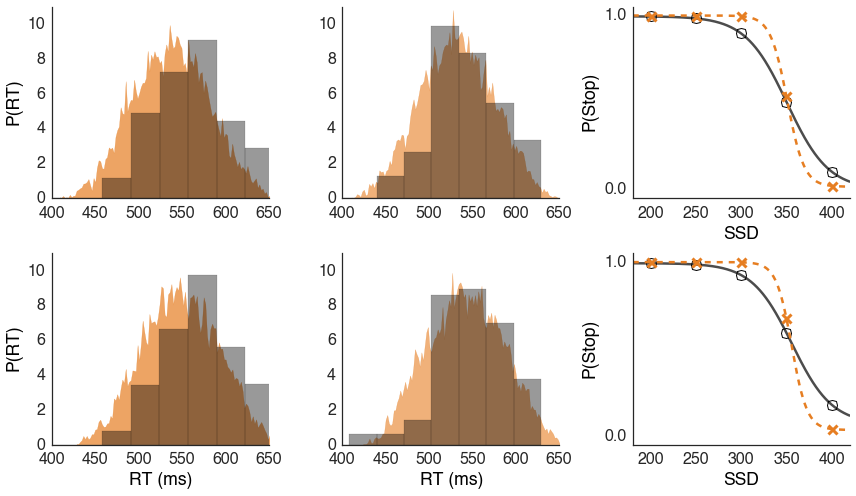

In [8]:
f, axes = plt.subplots(2,3,figsize=(12, 7))
sns.set_context('notebook', font_scale=1.6)
fits=m.fits.reshape(2,16)
y=m.avg_y
labels=['Baseline', 'Caution']
datas=[redata.query('Cond=="bsl"'), redata.query('Cond=="pnl"')]

for ax in axes.flatten():
      if ax.is_last_col():
            continue
      ax.set_ylim(0,11)

for i in range(m.ncond):
      vis.plot_fits(y[i], fits[i], kind='radd', colors=["#e67e22"]*2, data=datas[i], axes=axes[i])

plt.savefig('re_driftonset_fits.png', dpi=500)
plt.savefig('re_driftonset_fits.svg', rasterized=True)